<a href="https://colab.research.google.com/github/ovargas-code/COVID-19/blob/master/Trabajo_Profe_Stanley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo para el profe Stanley**.
Presentado por Orión Vargas.

1. Voy a cargar los datos con variables relacionadas con el rendimiento académico de estudiantes de bachillerato.
La variable dependiente es el **rendimiento académico**.

In [2]:
# Voy a leer el archivo .csv con la función de Python pd.read_csv.
# Importo las librerías necesarias: pandas, mathplotlib y numpy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importo el archivo cvs a Colab como usted nos enseñó
from google.colab import files
uploaded = files.upload()

# Dado que la primera fila del archivo csv tiene encabezado establezco header
# en 0
df = pd.read_csv('rendimiento_academico.csv',header=0)

# Ahora verifico que si carga el archivo csv con las 4 primeras filas con head()
df.head(5)

Saving rendimiento_academico.csv to rendimiento_academico.csv


,NUMERO,genero,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1,Masculino,NaN,20,0,0,0,NaN,66,66,...,58,0,65,79,20,6,9,3,2011,2
1,2,Masculino,2.0,2,1,19,5,523.0,99,99,...,61,0,64,60,1,5,9,3,2011,2
2,3,Femenino,2.0,20,1,121,18,483.0,64,64,...,63,0,64,77,20,6,9,3,2011,1
3,4,Femenino,1.0,19,1,19,5,529.0,89,89,...,83,0,62,75,19,5,9,2,2011,1
4,5,Femenino,2.0,8,1,19,5,478.0,78,78,...,66,0,60,70,8,3,9,3,2011,2


2. Ahora voy a **preparar** los datos del cvs

In [190]:
# 2.1 Voy a identificar las columnas del csv con varianza 0 (valor promedio de la media).
# Con esto mido la dispersión de la variable. Es decir, columnas que tienen
# valor (número repetido) Estas columnas con valores repetidos en nada
# contribuyen. Uso la función shape() para ver la matriz de 2008 filas y 24
# columnas
df.shape
print(df.shape)

(2008, 24)


In [191]:
# Uso la función unique () para visualizar cada columna del conjunto de datos y
# la "n" para ver sus respectivos valores
print(df.nunique())

NUMERO               2008
genero                  2
TIPO_COLEGIO            3
LOCALIDAD_COLEGIO      22
CALENDARIO              4
MUNICIPIO             106
DEPARTAMENTO           24
PG_ICFES              234
CON_MAT_ICFES          62
APT_MAT_ICFES          60
FISICA_ICFES           48
QUIMICA_ICFES          45
APT_VERB_ICFES         41
LITERATURA_ICFES       50
BIOLOGIA_ICFES         53
SOCIALES_ICFES         39
FILOSOFIA_ICFES        54
IDIOMA_ICFES           63
LOCALIDAD              21
DISTANCIA               7
INSCRIPCION             8
ESTRATO                 6
ANO_INGRESO             8
RENDIMIENTO_UNO         4
dtype: int64


3. Ahora voy a identificar las filas del csv donde aparezcan **datos duplicados**.

In [192]:
# Estas filas duplicadas en el conjunto de datos pueden producir "sesgos en el
# modelo de aprendizaje automático" Lo voy a hacer con la función de Python
# duplicated ()
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2003,False
2004,False
2005,False
2006,False


*Dado que aparece **FALSE** entonces se puede concluir que no hay filas duplicadas.*

4. Ahora voy a identificar valores atípicos en el csv. Estos valores están alejados del resto de los valores si todos llegaran a ser agrupados.

In [193]:
# Por ejemplo, la palabra género es la única variable que está en minúscula.
# El resto está en mayúscula. Vamos a cambiarla por "GENERO"
df.rename(columns={'genero':'GENERO'}, inplace=True)
df.head(5)

,NUMERO,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1,Masculino,NaN,20,0,0,0,NaN,66,66,...,58,0,65,79,20,6,9,3,2011,2
1,2,Masculino,2.0,2,1,19,5,523.0,99,99,...,61,0,64,60,1,5,9,3,2011,2
2,3,Femenino,2.0,20,1,121,18,483.0,64,64,...,63,0,64,77,20,6,9,3,2011,1
3,4,Femenino,1.0,19,1,19,5,529.0,89,89,...,83,0,62,75,19,5,9,2,2011,1
4,5,Femenino,2.0,8,1,19,5,478.0,78,78,...,66,0,60,70,8,3,9,3,2011,2


5. Ahora voy a usar el método de la **desviación estándar** para identificar valores atípicos.

Este método se basa en la idea de que la mayoría de los datos en una distribución se encuentran dentro de ciertos límites de desviación estándar y que los valores que están alejados de la de la media pueden ser considerados como valores atípicos.
Este método lo podemos aplicar cuando se sabe que el conjunto de datos tiene una distribución en forma de campana (gaussiana) lo cual no es lo que se presenta normalmente.
La desviación estándar se utiliza en estadística descriptiva para calcular la dispersión en la que los puntos de datos individuales difieren o se alejan de la media.
Una desviación estándar baja indica que estos puntos de datos están cerca de la media y una desviación estándar alta indica que los puntos de datos están muy dispersos.

In [194]:
# Cargo estas medidas de tendencia central (media) y dispersión (desviación estándar) desde Numpy
from numpy import mean, std

media = df["PG_ICFES"].mean()
# mean es la función de numpy sin ejecutar
# media es la variable donde yo guardé el resultado de df["PG_ICFES"].mean()

desviacion = df["PG_ICFES"].std()

print("La media de la columna PG_ICFES es:", media)
print("La desviación estándar es:", desviacion)

La media de la columna PG_ICFES es: 394.04583956153465
La desviación estándar es: 48.8379611780027


In [195]:
# Ahora defino 3 desviaciones estándar (el conjunto de datos es pequeño) como
# corte para identificar estos valores atípicos.
corte = desviacion * 3
print("El corte es:", corte)

El corte es: 146.5138835340081


In [196]:
# Con este corte encuentro los puntos max (valores o rangos por encima) y min
# (valores o rangos por debajo)
superior = media + corte
inferior = media - corte
print("El valor máximo o rango superior es:", superior)
print("El valor mínimo o rango inferior es:", inferior)


El valor máximo o rango superior es: 540.5597230955427
El valor mínimo o rango inferior es: 247.53195602752655


In [197]:
# Con los condicionales aprendidos en el primer módulo, voy a ver cuántos y cuáles son
# valores atípicos.
cantidad_valores_atipicos = len(valores_atipicos)
print("El número total de valores atípicos es:", cantidad_valores_atipicos)
valores_atipicos = [X for X in df["PG_ICFES"] if X > superior or X < inferior]
print("Los valores atípicos son:", valores_atipicos)

El número total de valores atípicos es: 3
Los valores atípicos son: [542.0, 544.0, 144.0]


In [198]:
# Con los condicionales aprendidos en el primer módulo, voy a ver cuales no son
# valores atípicos.
cantidad_valores_no_atipicos = len(valores_no_atipicos)
print("El número total de valores no atípicos es:", cantidad_valores_no_atipicos)
valores_no_atipicos = [X for X in df["PG_ICFES"] if X < superior and X > inferior]
print("Los valores no atípicos son:", valores_no_atipicos)

El número total de valores no atípicos es: 2004
Los valores no atípicos son: [523.0, 483.0, 529.0, 478.0, 385.0, 505.0, 492.0, 483.0, 499.0, 401.0, 447.0, 479.0, 466.0, 516.0, 521.0, 505.0, 442.0, 485.0, 488.0, 492.0, 468.0, 525.0, 499.0, 481.0, 497.0, 359.0, 453.0, 473.0, 502.0, 490.0, 489.0, 455.0, 503.0, 478.0, 491.0, 485.0, 491.0, 506.0, 466.0, 478.0, 480.0, 508.0, 495.0, 473.0, 491.0, 469.0, 505.0, 429.0, 475.0, 497.0, 486.0, 490.0, 491.0, 492.0, 519.0, 501.0, 516.0, 494.0, 427.0, 485.0, 471.0, 475.0, 472.0, 524.0, 477.0, 370.0, 490.0, 522.0, 481.0, 480.0, 495.0, 517.0, 480.0, 478.0, 492.0, 464.0, 467.0, 481.0, 472.0, 507.0, 474.0, 492.0, 518.0, 475.0, 476.0, 515.0, 490.0, 530.0, 476.0, 493.0, 488.0, 486.0, 507.0, 505.0, 492.0, 463.0, 492.0, 523.0, 490.0, 475.0, 394.0, 478.0, 492.0, 490.0, 475.0, 482.0, 491.0, 466.0, 475.0, 458.0, 479.0, 465.0, 472.0, 451.0, 423.0, 435.0, 438.0, 435.0, 459.0, 432.0, 444.0, 447.0, 422.0, 437.0, 442.0, 431.0, 440.0, 411.0, 414.0, 430.0, 441.0, 415.0

6. Ahora voy a hacer lo mismo (valores atípicos) pero por el método de intercuartiles (IQR).

In [199]:
# Lo bueno de este método es que resiste a distribuciones no normales o
# sesgadas.
# Aprendimos que este método se basa en dividir el conjunto # de datos en 4
# cuartiles (25%, 50%, 75% y 100%), utilizando los percentiles para la
# definición de los límites inferiores y superiores.
# La variabilidad dentro del rango intercuartil que es calculada mediante
# la diferencia entre Q3 y Q1 define lo que hace este método.
# Al establecer los límites inferior y superior podemos identificar
# valores atípicos los cuales estarán por debajo del Q1 o por encima del Q3.

# Voy a calcular los valores cuartiles e identificar valores atípicos para
# todas las columnas numéricas.

for column in df.select_dtypes(include=np.number).columns:
  cuartiles = df[column].quantile([0.25, 0.5, 0.75])
  cuartiles.head(3)
  print(cuartiles)

0.25     502.75
0.50    1004.50
0.75    1506.25
Name: NUMERO, dtype: float64
0.25    0.0
0.50    0.0
0.75    1.0
Name: TIPO_COLEGIO, dtype: float64
0.25     4.0
0.50    10.0
0.75    18.0
Name: LOCALIDAD_COLEGIO, dtype: float64
0.25    0.0
0.50    0.0
0.75    1.0
Name: CALENDARIO, dtype: float64
0.25     0.0
0.50     0.0
0.75    19.0
Name: MUNICIPIO, dtype: float64
0.25    0.0
0.50    0.0
0.75    5.0
Name: DEPARTAMENTO, dtype: float64
0.25    352.0
0.50    396.0
0.75    431.0
Name: PG_ICFES, dtype: float64
0.25    68.0
0.50    73.0
0.75    78.0
Name: CON_MAT_ICFES, dtype: float64
0.25     0.0
0.50    65.0
0.75    75.0
Name: APT_MAT_ICFES, dtype: float64
0.25     0.0
0.50    53.0
0.75    63.0
Name: FISICA_ICFES, dtype: float64
0.25     0.0
0.50    51.0
0.75    60.0
Name: QUIMICA_ICFES, dtype: float64
0.25     0.0
0.50    53.0
0.75    62.0
Name: APT_VERB_ICFES, dtype: float64
0.25    59.0
0.50    64.0
0.75    69.0
Name: LITERATURA_ICFES, dtype: float64
0.25    58.0
0.50    65.0
0.75    71

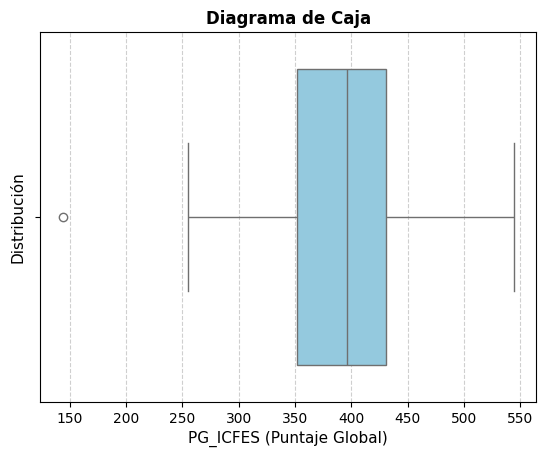

In [200]:
# Ahora con diagrama de bigotes voy a visualizar la dispersión y la
# distribución de los datos para mirar cuales valores pueden ser atípicos en
# relación con el rango intercuartil. El percentil 50 es el valor medio o
# promedio del conjunto de datos y se encuentra en el centro de la caja del
# diagrama de bigotes. Si un valor está por fuera de estos límites entonces es
# un posible avlor atípico y se muestra como un punto individual.

from matplotlib import pyplot as plt
import seaborn as sns # Esta librería mejora la graficación.

# Mejoremos la sintaxis del gráfico y que este quede horizontal.
# Ajustemos el tamaño del gráfico.
import seaborn as sns
import matplotlib.pyplot as plt

# Hagamos el gráfico de caja de PG_ICFES
sns.boxplot(x=df["PG_ICFES"], color="skyblue")

# Demos nuestro toque de diseñador
plt.title("Diagrama de Caja", fontsize=12, weight="bold")
plt.xlabel("PG_ICFES (Puntaje Global)", fontsize=11)
plt.ylabel("Distribución", fontsize=11)

# Vamos a mostrar los ejes
plt.grid(True, axis="x", linestyle="--", alpha=0.6)

plt.show()


1. La caja representa el rango intercuartílico (IQR), que es el espacio entre Q1 (25% de los datos) y Q3 (75% de los datos).
El 50% central de los datos se encuentra dentro de esta caja. La longitud de la caja nos da una idea de la dispersión de los datos.

2. La línea naranja dentro de la caja es la mediana de los datos (el 50% de los datos). Es el valor central cuando los datos están ordenados. Si la mediana no está en el centro exacto de la caja, puede indicar que los datos están sesgados.

3. Los bigotes o whiskers que se extienden desde la caja llegan hasta el valor más bajo y más alto dentro de un rango aceptable (comúnmente definido como Q1 - 1.5 * IQR y Q3 + 1.5 * IQR). Nos muestran la extensión de los datos que no se consideran atípicos.

4. Cualquier punto que se encuentre por encima o por debajo de los bigotes se considera un posible valor atípico (outlier). Estos puntos están significativamente alejados de la mayoría de los datos. En el gráfico de "PG_ICFES", podemos ver un punto individual por debajo del bigote inferior, lo que indica un valor atípico bajo.


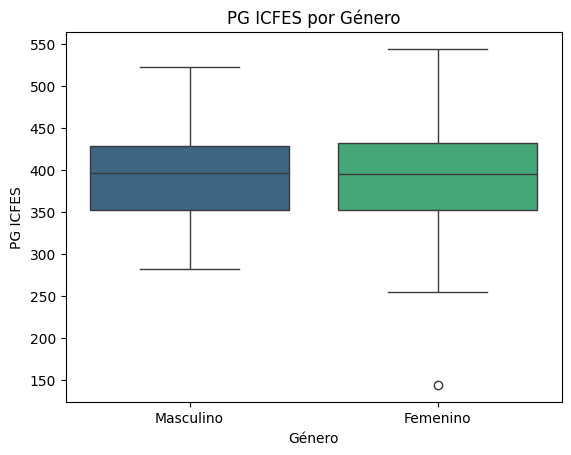

In [201]:
# Ahora comparemos dos diagramas de caja de PG_ICFES por género (masculino/femenino)
import seaborn as sns
import matplotlib.pyplot as plt

# Hagamos el diagrama de caja con colores por género y en donde legend=False evita la duplicidad del eje x=GENERO y hue=GENERO
sns.boxplot(x="GENERO", y="PG_ICFES", data=df, hue="GENERO", palette="viridis", legend=False)

plt.title("PG ICFES por Género")
plt.xlabel("Género")
plt.ylabel("PG ICFES")
plt.show()


7. Para establecer donde se considera un valor atípico antes de Q1 y después de Q3, vamos a establecer un valor de k del rango intercuartílico.
Un valor atípico leve estará 1.5 veces por debajo o inferior de Q1
y 1.5 veces superior o por encima de Q3.

Mejor dicho: q < Q1 - 1.5 IQR o q > Q3 + 1.5 IQR

Dado que hay valores nulos o no numéricos NaN limpiaré la columna eliminando los NaN empleando el método dropna() de Numpy

In [217]:
from numpy import percentile

# Eliminar valores nulos en PG_ICFES
pg_icfes = df["PG_ICFES"].dropna()

# Calcular Q1, Q3 e IQR
q25, q75 = percentile(pg_icfes, 25), percentile(pg_icfes, 75)
iqr = q75 - q25

print('Percentil 25:', q25)
print('Percentil 75:', q75)
print('IQR:', iqr)

# Rangos por debajo y por encima de Q1 y Q3
limite_inferior, limite_superior = q25 - 1.5 * iqr, q75 + 1.5 * iqr

print('Rango o límite inferior:', limite_inferior)
print('Rango o límite superior:', limite_superior)

# Tamaño original
print("Tamaño original:", len(df))

# Conjunto de datos luego de borrar los valores atípicos
print('Tamaño luego de borrar valores atípicos:', len(pg_icfes))


Percentil 25: 352.0
Percentil 75: 431.0
IQR: 79.0
Rango o límite inferior: 233.5
Rango o límite superior: 549.5
Tamaño original: 2008
Tamaño luego de borrar valores atípicos: 2007


8. Dado que se presentaron valores nulos o faltantes (NaN) en el caso anterior, vamos a identificarlos pues distorsionan las estadísticas descriptivas como la media, la median y la desviación estándar. (

NaN = Not a Number = No es un número)


In [232]:
# Para que me aparezcan las columnas en mayúsculas. Otro ejercicio del primer
# módulo en Python.

df.columns = df.columns.str.upper()

# Veamos cuales son los datos nulos en el conjunto de datos con la función
# pd.isnull().
# TRUE significa valor nulo y FALSE valor no nulo.
# Se ve como la # variable "TIPO_COLEGIO" en la primera fila tiene un valor nulo.

df.isnull()

,NUMERO,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [227]:
# Ahora hagamos lo mismo pero sumando los valores Nulos encontrados para cada
# caracteristica en el conjunto de datos.

print(df.isnull().sum())

NUMERO               0
GENERO               0
TIPO_COLEGIO         1
LOCALIDAD_COLEGIO    0
CALENDARIO           0
MUNICIPIO            0
DEPARTAMENTO         0
PG_ICFES             1
CON_MAT_ICFES        0
APT_MAT_ICFES        0
FISICA_ICFES         0
QUIMICA_ICFES        0
APT_VERB_ICFES       0
LITERATURA_ICFES     0
BIOLOGIA_ICFES       0
SOCIALES_ICFES       0
FILOSOFIA_ICFES      0
IDIOMA_ICFES         0
LOCALIDAD            0
DISTANCIA            0
INSCRIPCION          0
ESTRATO              0
ANO_INGRESO          0
RENDIMIENTO_UNO      0
dtype: int64


In [231]:
# También identifiquemos en una columna en especial si hay valores errados
print(df.groupby("TIPO_COLEGIO").size())

TIPO_COLEGIO
0.0    1052
1.0     462
2.0     493
dtype: int64


9. Veamos como manejar estos valores nulos (NaN)

In [257]:
# Miremos las dimensiones del conjunto de datos original
print("Conjunto de datos original:")
print("Filas:", len(df), "Columnas:", len(df.columns))

# Ahora borremos las columnas con NaN
df_sin_columnas = df.dropna(axis=1)

# Ahora borramos las filas con NaN
df_sin_filas = df.dropna(axis=0)

print("\nConjunto de datos quitando las columnas con NaN:")
print("Filas:", len(df_sin_columnas), "Columnas:", len(df_sin_columnas.columns))

print("\nConjunto de datos quitando las filas con NaN:")
print("Filas:", len(df_sin_filas), "Columnas:", len(df_sin_filas.columns))


Conjunto de datos original:
Filas: 2008 Columnas: 24

Conjunto de datos quitando las columnas con NaN:
Filas: 2008 Columnas: 22

Conjunto de datos quitando las filas con NaN:
Filas: 2007 Columnas: 24


In [3]:
# Otra forma de hacer lo anterior es "imputando datos". Esto consiste en
# reemplazar los datos faltantes por la media, la mediana o la moda. En este
# ejemplo se ve que la primera fila para la columna de puntaje ICFES (PG_ICFES)
# el valor es NaN.

# Vamos a calcular el promedio de la columan 'PG_ICFES', ignorando los valores
# NaN
PROMEDIO_PG_ICFES = df["PG_ICFES"].mean()

print("El promedio de la columna PG_ICFES es:", PROMEDIO_PG_ICFES)

# Vamos a reemplazar los valores NaN en 'PG_ICFES' con el promedio calculado
df["PG_ICFES"] = df["PG_ICFES"].fillna(PROMEDIO_PG_ICFES)

# Vamos a verificar si funciona con las primeras lineas
display(df.head())

El promedio de la columna PG_ICFES es: 394.04583956153465


,NUMERO,genero,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1,Masculino,NaN,20,0,0,0,394.04584,66,66,...,58,0,65,79,20,6,9,3,2011,2
1,2,Masculino,2.0,2,1,19,5,523.00000,99,99,...,61,0,64,60,1,5,9,3,2011,2
2,3,Femenino,2.0,20,1,121,18,483.00000,64,64,...,63,0,64,77,20,6,9,3,2011,1
3,4,Femenino,1.0,19,1,19,5,529.00000,89,89,...,83,0,62,75,19,5,9,2,2011,1
4,5,Femenino,2.0,8,1,19,5,478.00000,78,78,...,66,0,60,70,8,3,9,3,2011,2


Aquí vemos como el campo "PG_ICFES" en la primera fila se le ha asignado el valor promedio de la columna de datos dando por resultado 394.04584.